In [ ]:
#correlation coefficient (r)

#step 1- define values for x and y
#step 2- calculate the means and print
#step 3- calculate covariance and print
#step 4- calculate std for x and y and print
#step 5- calculate correlation coefficient
#step 6- verify value using pearson's coefficient

In [ ]:
#defining x and y

x = [2,3,5,7,9]
y = [50,60,80,85,95]

n = len(x)

#calculating mean
x_bar = sum(x)/n
y_bar = sum(y)/n

print("mean of x is", x_bar)
print("mean of y is", y_bar)

#covariance
cov = 0
for xi,yi in zip(x,y):
  cov+= (xi-x_bar) * (yi-y_bar)
cov = cov/n

print("\ncovariance is", cov)

#standard deviations for x and y
xstd = 0
ystd = 0
for xi in x:
  xstd+= (xi-x_bar)**2
xstd = (xstd/n)**0.5

for yi in y:
  ystd+= (yi-y_bar)**2
ystd = (ystd/n)**0.5

print("\nstandard deviation of x is", xstd)
print("standard deviation of y is", ystd)

#correlation coefficient
r = cov/(xstd*ystd)
print("\ncorrelation coefficient is", r)

mean of x is 5.2
mean of y is 74.0

covariance is 41.2

standard deviation of x is 2.5612496949731396
standard deviation of y is 16.55294535724685

correlation coefficient is 0.971784605540551


In [ ]:
#verifying through pearson thingy
from scipy.stats import pearsonr

corr = pearsonr(x,y)
print('correlation coefficient:', corr[0])

correlation coefficient: 0.9717846055405512


In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Data202/life_expectancy.csv')

df.head()

Mounted at /content/drive


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.shape

(2938, 22)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(1649, 22)

In [ ]:
print(list(df.columns))

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [ ]:
df.columns = ['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol',
              'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
              'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
              'thinness 1-19 years', 'thinness 5-9 years', 'Income', 'Schooling']

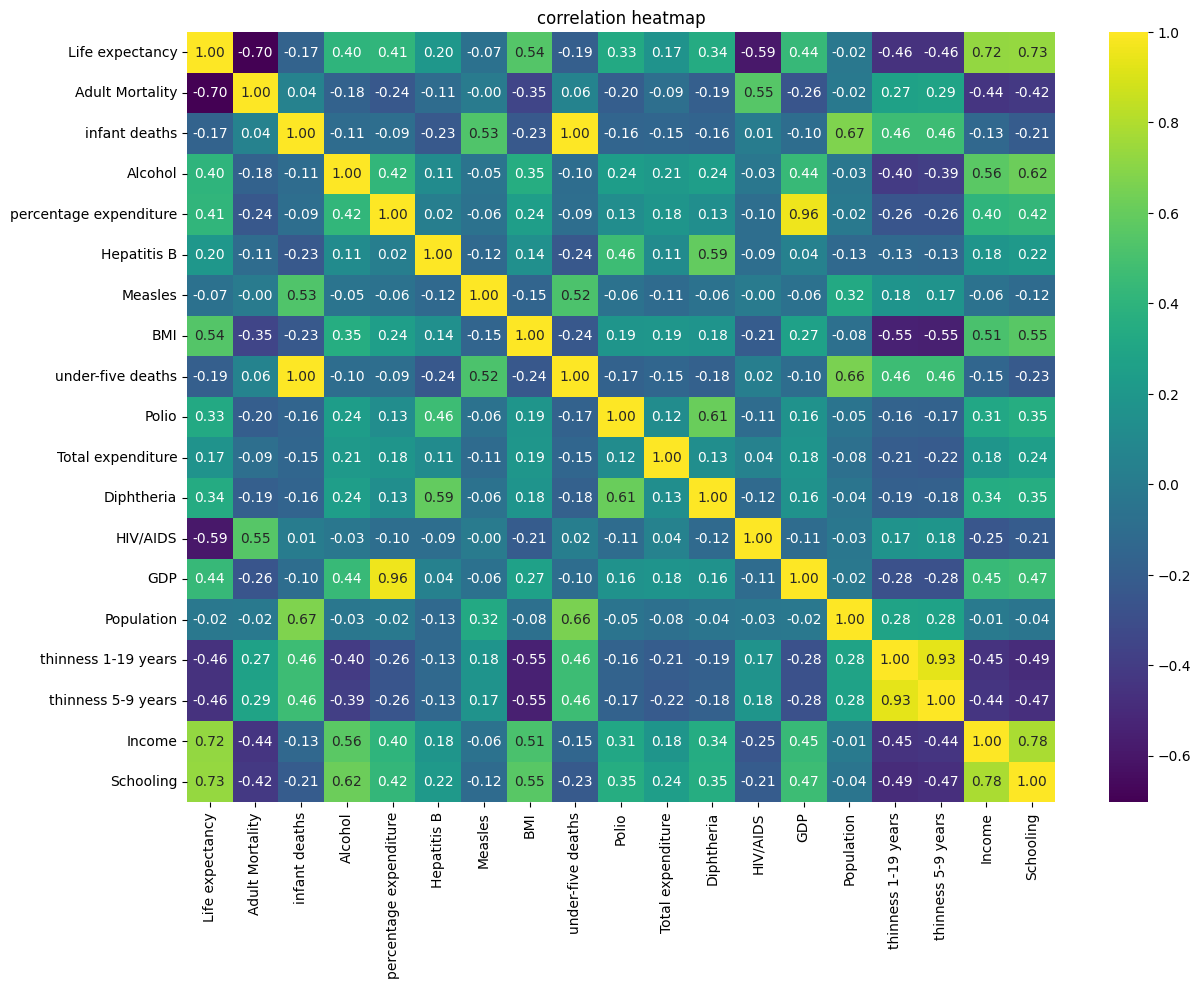

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
            'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
            'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years',
            'Income', 'Schooling']

correlation = df[features].corr()

plt.figure(figsize = (14,10))
sns.heatmap(correlation, annot = True, cmap = 'viridis', fmt = '.2f')

plt.title("correlation heatmap")
plt.show()

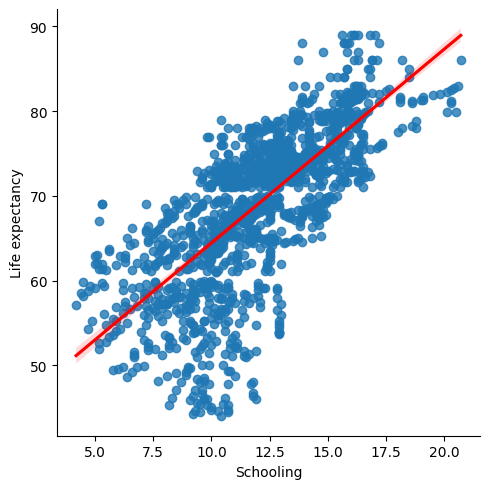

In [ ]:
#plot between schooling and life expectancy
sns.lmplot(x='Schooling', y='Life expectancy', data=df, line_kws={'color': 'red'})

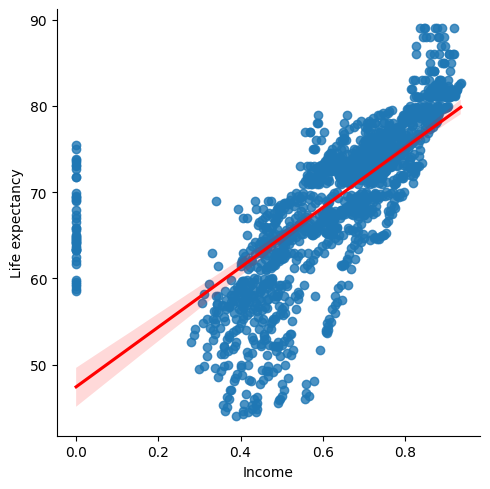

In [ ]:
# income and life expectancy
sns.lmplot(x='Income', y='Life expectancy', data=df, line_kws={'color': 'red'})

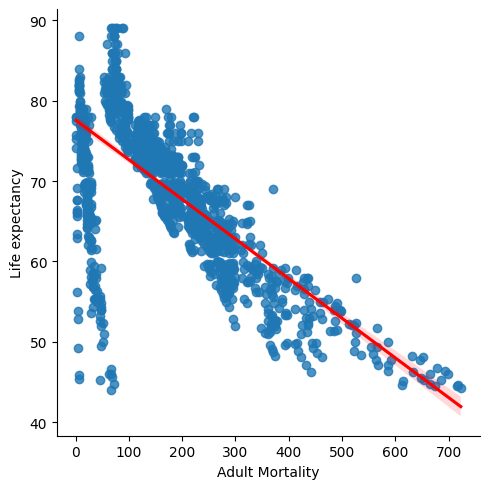

In [ ]:
#adult mortality and life expectancy
sns.lmplot(x = 'Adult Mortality', y='Life expectancy', data =df,line_kws={'color': 'red'})

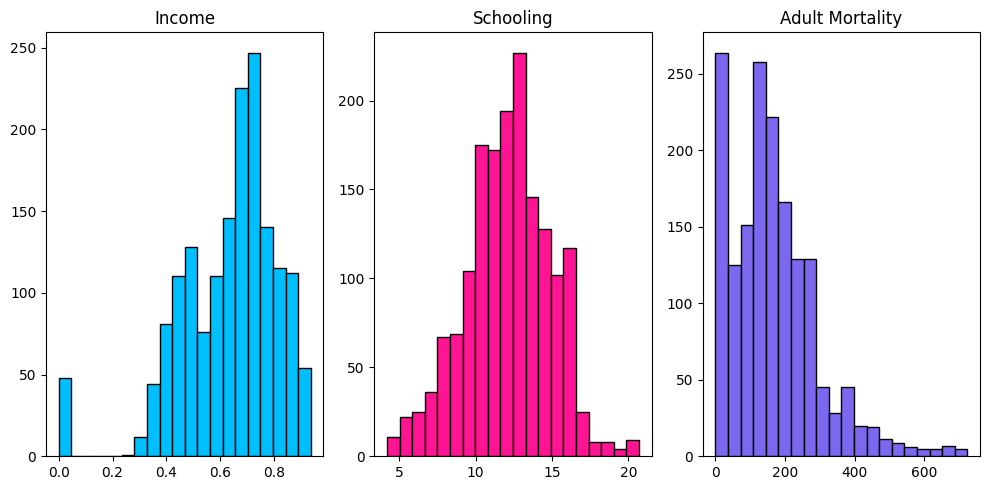

In [ ]:
#histogram for income, schooling, and adult mortality
plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
plt.hist(df['Income'], bins = 20, facecolor = 'deepskyblue', edgecolor = 'black')
plt.title('Income')

plt.subplot(1,3,2)
plt.hist(df['Schooling'], bins = 20, facecolor = 'deeppink', edgecolor = 'black')
plt.title('Schooling')

plt.subplot(1,3,3)
plt.hist(df['Adult Mortality'], bins = 20, facecolor = 'mediumslateblue', edgecolor = 'black')
plt.title('Adult Mortality')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts

In [ ]:
x = df[['Schooling','Income', 'Adult Mortality']]
y = df['Life expectancy']

np.random.seed(42)
x_train,x_test,y_train,y_test = tts(x, y, test_size = 0.2, random_state = 42)

model = lm.LinearRegression()
model.fit(x_train, y_train)

print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

Coefficient: 1.1213871385396124
Intercept: 53.77927271228249


In [ ]:
y_pred = model.predict(x_test)

mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = model.score(x_test,y_test)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 19.17995934975147
Mean Absolute Error: 3.106147871016833
Root Mean Squared Error: 4.379493047117608
R-squared: 0.7299452491719696


In [ ]:
n = len(y_test)
p = x_test.shape[1]
adj_r2 = 1 - ((1-r2)*(n-1)/(n-p-1))
print(f'Adjusted R-squared: {adj_r2}')

Adjusted R-squared: 0.7274600827533066


# ***SIMPLE LINEAR REGRESSION***

In [ ]:
#we do bias-variance on x is schooling and y is life expectancy

x = df[['Schooling']]
y = df['Life expectancy']

np.random.seed(25)

x_train,x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 25)

def bias_variance_estimator(estimator, x_train,x_test,y_train,y_test,bootstraps_rounds = 30):
  preds_test = pd.DataFrame(index = y_test.index)

  for r in range(bootstraps_rounds):
    boot_indices = np.random.randint(len(y_train), size = len(y_train))
    boot_x_train = x_train.iloc[boot_indices]
    boot_y_train = y_train.iloc[boot_indices]

    model = estimator.fit(boot_x_train, boot_y_train)
    preds_test[f'Model_{r}'] = model.predict(x_test)

  mean_preds_test = preds_test.mean(axis = 1)
  mse = preds_test.apply(lambda col: mean_squared_error(y_test, col), axis = 0).mean()
  bias_sq = mean_squared_error(y_test, mean_preds_test)

  variance = preds_test.apply(lambda col: mean_squared_error(mean_preds_test,col)).mean()

  return mse, bias_sq, variance, preds_test

estimator = lm.LinearRegression()
mse, bias_sq, variance, predictions_df = bias_variance_estimator(estimator, x_train, x_test, y_train, y_test)

#printing the results
print(f'MSE: {mse}')
print(f'Bias^2: {bias_sq}')
print(f'Variance: {variance}')
print(f'Bias^2 + Variance: {bias_sq+variance} = MSE')

MSE: 36.714224021371635
Bias^2: 36.67023864025119
Variance: 0.04398538112045276
Bias^2 + Variance: 36.71422402137164 = MSE


In [ ]:
from mlxtend.evaluate import bias_variance_decomp
np.random.seed(25)
estimator = lm.LinearRegression()

mse,bias_sq,variance = bias_variance_decomp(
    estimator, x_train.values, y_train.values, x_test.values, y_test.values,
    loss = 'mse', num_rounds = 30, random_seed = 25
)

print(f'MSE: {mse}')
print(f'Bias^2: {bias_sq}')
print(f'Variance: {variance}')
print(f'Bias^2 + Variance :{bias_sq + variance} = MSE')

MSE: 36.714224021371635
Bias^2: 36.67023864025119
Variance: 0.04398538112045278
Bias^2 + Variance :36.71422402137164 = MSE
